<a href="https://colab.research.google.com/github/sk2003hw/Netflix-EDA-and-Visualization/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Exploratory Data Analysis and Visualizations
Netflix is a popular American streaming platform with movies and TV shows that viewers can watch anytime after buying a subscription. Data related to the content on this platform has been obtained from [Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows) and is analysed in this project.

## Data Exploration and Preparation

In [1]:
# Necessary imports for calculations and analysis
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

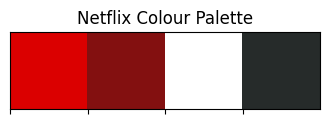

In [2]:
# Netflix Colour palette from https://www.color-hex.com/color-palette/22942
# To set the theme of the visualizations
sns.set_palette(['#db0000', '#831010', '#ffffff', '#262B2A' ])

# To visualize the colour palette
sns.palplot(['#db0000', '#831010', '#ffffff', '#262B2A'])
plt.title("Netflix Colour Palette")
plt.show()

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv') # opening the csv file with the data

In [4]:
data.head() # getting a glimpse of the data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
data.shape # to view the dimensions of the dataframe
# the data contains 12 columns/attributes and 6234 records/rows of data.

(6234, 12)

In [6]:
data.columns # to view the names of the columns/attributes

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Additional Info**  
'show_id' - unique show identifier, 'type' - title type (movie/ TV series), 'title'- name of the title, 'date_added' - date of addition on Netflix, 'rating' - age-wise rating given to movies ot TV shows, 'duration' - length of the movie/show, 'listed_in' - category or genre of the title

In [7]:
data.info() # to view the datatypes of each field and the number of 'NULL' values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [8]:
data.rename(columns={'listed_in': 'category'}, inplace=True) # renaming the listed_in column for better understandability

In [9]:
data.duplicated().sum() # to check for any duplicate records across the dataframe, but none were found

0

In [10]:
data.isnull().sum() # to check for the number of nulls in each column, 5 columns have null values

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
category           0
description        0
dtype: int64

In [11]:
data['show_id'].nunique() # confirming the number of unique show ids which seems to correspond the number of records so we are good to proceed

6234

In [12]:
data['type'].value_counts() # to see the different values the type column takes and their number of occurences
# the 2 types of shows/titles are Movies and TV Shows with the former accounting a larger portion of them

Movie      4265
TV Show    1969
Name: type, dtype: int64

In [13]:
data['rating'].unique() # to see the different types of ratings
# 'nan' which corresponds to the null values can be notices here while the rest are actual rating values and not incorrect
# NR (not rated) and UR (unrated) means the titles have not been rated by any organization

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [14]:
data['category'].unique()  # to see the different types of categories
# the column contains multiple categories separated by commas so they should be split to analyse the categries in better detail

array(['Children & Family Movies, Comedies', 'Stand-Up Comedy',
       "Kids' TV", 'Comedies',
       'Crime TV Shows, International TV Shows, Spanish-Language TV Shows',
       'International Movies, Sci-Fi & Fantasy, Thrillers',
       'Docuseries, Science & Nature TV', 'Action & Adventure, Thrillers',
       'Action & Adventure, Dramas, International Movies',
       'Children & Family Movies',
       'Cult Movies, Dramas, Independent Movies',
       'Comedies, Independent Movies, Romantic Movies',
       'Action & Adventure, Comedies, International Movies',
       'Documentaries', 'Horror Movies, Thrillers',
       'Dramas, Independent Movies',
       'Dramas, Independent Movies, Romantic Movies',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'Docuseries', 'Horror Movies, International Movies',
       'Children & Family Movies, Comedies, Sci-Fi & Fantasy',
       'Comedies, Romantic Movies',
       'Dramas, International Movies, Thrillers',
       'Dramas, 

In [15]:
data['date_added'] = pd.to_datetime(data['date_added']) # converting the date_added field to datetime type to make better use of the date
# to retrive the year and month from the date added for further analysis
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

In [16]:
data[data['date_added'].isna()] # to view the null date_added values before further processing on this field

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description,year_added,month_added
6223,70204989,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",NaN,NaN
6224,70304979,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...,NaN,NaN
6225,70153412,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,NaN,NaN
6226,70243132,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaN,NaN
6227,80005756,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",NaN,NaN
6228,80159925,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaN,NaN
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaN,NaN
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN,NaN
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaT,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...,NaN,NaN
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",NaN,NaN


Dealing with the NULL values

In [17]:
data['year_added'] = data['year_added'].fillna(data['release_year']) # the year added nulls are replaced with the same year as their release
data = data.drop('date_added', axis=1) # date_added column is dropped as the year and mostly the month would help rather than the entire date

In [18]:
data['cast'] = data['cast'].fillna('') # null cast values are changed to empty string to remove nulls but to keep the records for better insights on the other fields
data['director'] = data['director'].fillna('')  # null director values are changed to empty string to remove nulls but to keep the records for better insights on the other fields

# null field values below are dropped as this field is vital for the analysis and no substitutions can be done
data.dropna(subset = ['rating'], inplace=True)
data.dropna(subset = ['month_added'], inplace=True)
data.dropna(subset = ['country'], inplace=True)

In [19]:
# changing the data type from floating point values to integers
data['year_added'] = data['year_added'].astype(int)
data['month_added'] = data['month_added'].astype(int)

Country and Category values are separated by columns so to visualize their occurences, these values are split by commas and put into another dataframe each with their number of occurences.

In [20]:
countries = {} # DICTIONARY- COUNTRY:NUMBER OF OCCURENCES

for country in list(data['country']):
    country = list(country.split(','))
    if len(country) == 1: # if there is only 1 country listed
        c = country[0].strip().lower() # to remove extra spaces and converting to lowercase for standardised indexing and retrieval
        if c in list(countries.keys()): # if the country exists in the dictionary as a key already, its value/occurence is incremented
            countries[c]+= 1
        else: # else the key is created and the no. of occurence is set to 1
            countries[c] = 1
    else: # for a list of countries in the same field, each country is checked using the same logic as above
        for c in country:
            c = c.strip().lower()
            if c in list(countries.keys()):
                countries[c]+= 1
            else:
                countries[c] = 1

In [21]:
# the same algorithm as above is repeated for the categories/genres

categories = {} # CATEGORY:NUMBER OF OCCURENCES
for category in list(data['category']):
    category = list(category.split(','))
    if len(category) == 1:
        c = category[0].strip().lower()
        if c in list(categories.keys()):
            categories[c]+= 1
        else:
            categories[c] = 1
    else:
        for c in category:
            c = c.strip().lower()
            if c in list(categories.keys()):
                categories[c]+= 1
            else:
                categories[c] = 1

## Analysis
Neither the ratings or reviews given by the users nor the popularity of the shows have been mentioned so it is difficult to comment on the ideal steps for teams behind the movies or shows to make.   

Therefore, each of the possible factors have been assessed with those uncertainities in mind and **assuming** that Netflix has acquired streaming rights based on how successful that title might be, releases accordingly, and continues to update its stretegy based on previous acquisitions.

### Type- Movie or TV Show?

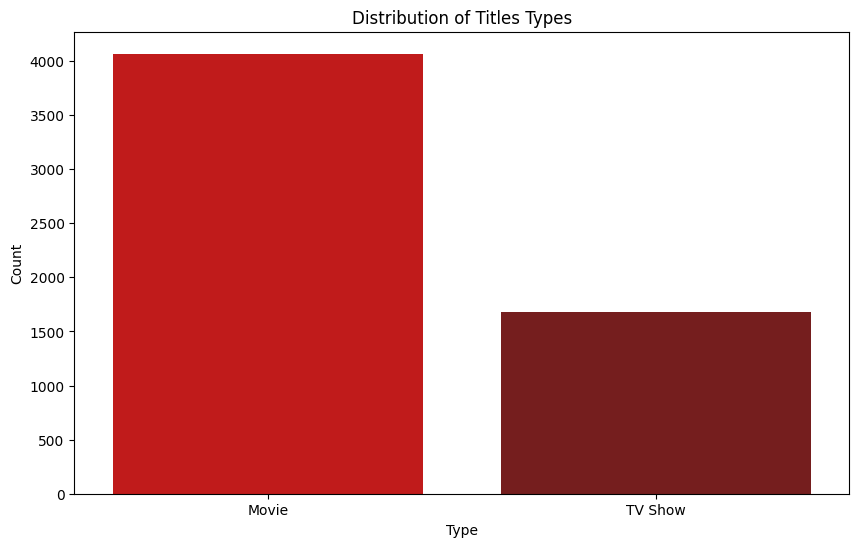

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x="type",data=data) # bar chart to visualize the distribution of types which is a categorical variable

# Axis labels and title
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Titles Types')

# Display the plot
plt.show()

# To make a pie chart instead
# types = data['type'].value_counts().reset_index()
# plt.pie(x=types['type'], labels=types['index'], autopct='%.0f%%')

More than double the number of movies have been added to the streaming platform compared to that of TV Shows. However we cannot come to a conclusion on which type is popular or that Netflix prefers movies to TV Shows as it depends on the rate of the production of the titles. Varipus factors such as the budget, timeframe and straightforwardly the script that the maker has influence this decision. Generally, 1 Season of a TV Shows is made quicker than a standard Movie however, Movies have been around way before TV Shows and can be made by most while that is not the case with TV Shows.  

In recent times, with a rising number of individuals opting to rest at home and having access to the internet, TV Shows and streaming platforms are becoming their preferred choices. So, delving into this recently-developing but underexplored (according to this data as well as the general statistics) can be tried.



### Country- Profitable Regions to Negotiate for and Release?

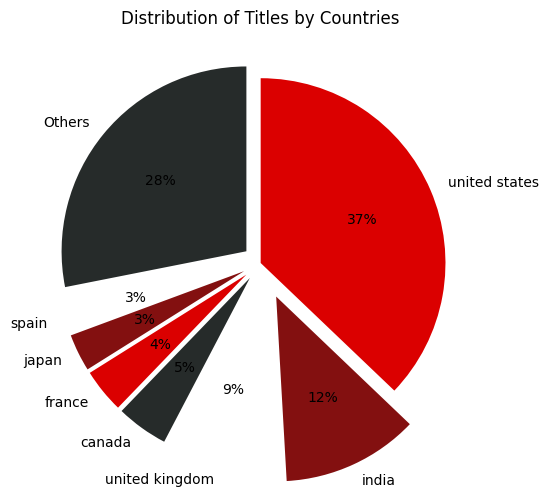

In [23]:
countries = {k: v for k, v in sorted(countries.items(), key=lambda item: item[1], reverse= True)} # ordering the countries in decresing order of the number of times each country is mentioned
countries_data = pd.DataFrame(data=countries.items(), columns=['Country', 'Number']) # creating a dataframe from the above dictionary
n = countries_data[8:]['Number'].sum() # summing up all the occurences after the first 7 records
df = pd.DataFrame({"Country":["Others"],"Number":[n]}) # temporary dataframe to add a one record for all the other countries

# first 7 records are left to be dealt with along with the 'Others' record created
countries_data = countries_data[:7]
df1 = pd.concat([countries_data,df], axis=0, ignore_index=True) # concatenating rows

plt.figure(figsize=(10,6))

# Piechart with values made from the no. of occurences and labels from the country names, the starting angle, direction, and how much to move away from the centre is given.
plt.pie(df1['Number'], labels=df1['Country'], counterclock=False, autopct='%.0f%%', explode = [0, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], startangle=90)

plt.title('Distribution of Titles by Countries')

plt.show()


Since just the top-7 countries where Netflix has decided to release titles following negotiations with studios [(refer here)](https://surfshark.com/best-rated-netflix-shows-and-movies#:~:text=Studios%20charge%20Netflix%20more%20for,for%20other%20regions%20might%20fail.) have been visualised, it can be concluded that these countries are the most profitable for Netflix. Possible stakeholders in this project like show makers could use this information to quote a slightly higher amount for some of these top countries while also basing that on other factors such as the relevance of that show/movie in that country based on other data (not present in this dataset).  

The US accounts for the majority which is more than that of all the other countries apart from the top-7 on the chart. Lesser than half of this proportion is of India and slightly lesser than this is the UK. These three could be the most viable regions to release their titles at given this data and the size and diversity of the population of these countries.

In [24]:
# Code repetition from above to get the number of tv shows and movies of each country separately (for use in Tableau later)
countries = {k: v for k, v in sorted(countries.items(), key=lambda item: item[1], reverse= True)}
countries_data = pd.DataFrame(data=countries.items(), columns=['Country', 'Number'])
countries_data['TV Shows'] = 0
countries_data['Movies'] = 0
for index,row in data.iterrows():
  country = list(row['country'].split(','))
  if len(country) == 1:
        c = country[0].strip().lower()
        if row['type'] == 'TV Show':
          countries_data.loc[countries_data['Country'].str.contains(c), 'TV Shows']+= 1
        else:
          countries_data.loc[countries_data['Country'].str.contains(c), 'Movies']+= 1

  else:
      for c in country:
          c = c.strip().lower()
          cd = countries_data.loc[countries_data['Country'].str.contains(c)]
          if row['type'] == 'TV Show':
            countries_data.loc[countries_data['Country'].str.contains(c), 'TV Shows']+= 1
          else:
            countries_data.loc[countries_data['Country'].str.contains(c), 'Movies']+= 1

In [25]:
countries_data.to_csv(index=False) # dataframe is converted to csv to be used in Tableau for visualizations there

'Country,Number,TV Shows,Movies\nunited states,2601,680,1924\nindia,838,55,786\nunited kingdom,601,222,382\ncanada,318,107,214\nfrance,271,70,204\njapan,229,154,78\nspain,178,45,136\nsouth korea,162,116,49\ngermany,151,25,129\nmexico,129,45,87\naustralia,124,48,79\nchina,120,36,87\nhong kong,97,4,96\nturkey,87,25,65\ntaiwan,75,65,13\nargentina,68,14,57\nbelgium,66,8,61\nbrazil,66,18,51\nitaly,66,15,54\nthailand,56,18,41\negypt,54,9,48\nindonesia,52,2,53\nphilippines,47,1,49\ndenmark,38,9,32\nnetherlands,37,6,34\nnigeria,36,0,39\ncolombia,36,23,16\nsweden,33,8,28\nireland,33,11,25\nsouth africa,30,5,28\nsingapore,30,13,20\npoland,27,5,25\nisrael,26,9,20\nchile,23,4,22\npakistan,23,4,22\nnew zealand,23,8,18\nnorway,21,8,16\nunited arab emirates,21,1,23\nrussia,21,14,10\nmalaysia,21,7,17\nswitzerland,15,1,17\nczech republic,15,5,13\naustria,10,1,12\nuruguay,9,0,12\nlebanon,9,7,5\nperu,9,0,12\nfinland,9,3,9\nbulgaria,8,0,11\ngreece,8,3,8\nluxembourg,7,0,10\nmorocco,6,0,9\njordan,6,1,8\nice

### Category- Popular Genres?

In [26]:
categories ={k: v for k, v in sorted(categories.items(), key=lambda item: item[1], reverse= True)} # oredering the categories in descending order of the number of occurences
category_data = pd.DataFrame(data=categories.items(), columns=['Category', 'Number']) # Category dictionary is changed to a dataframe

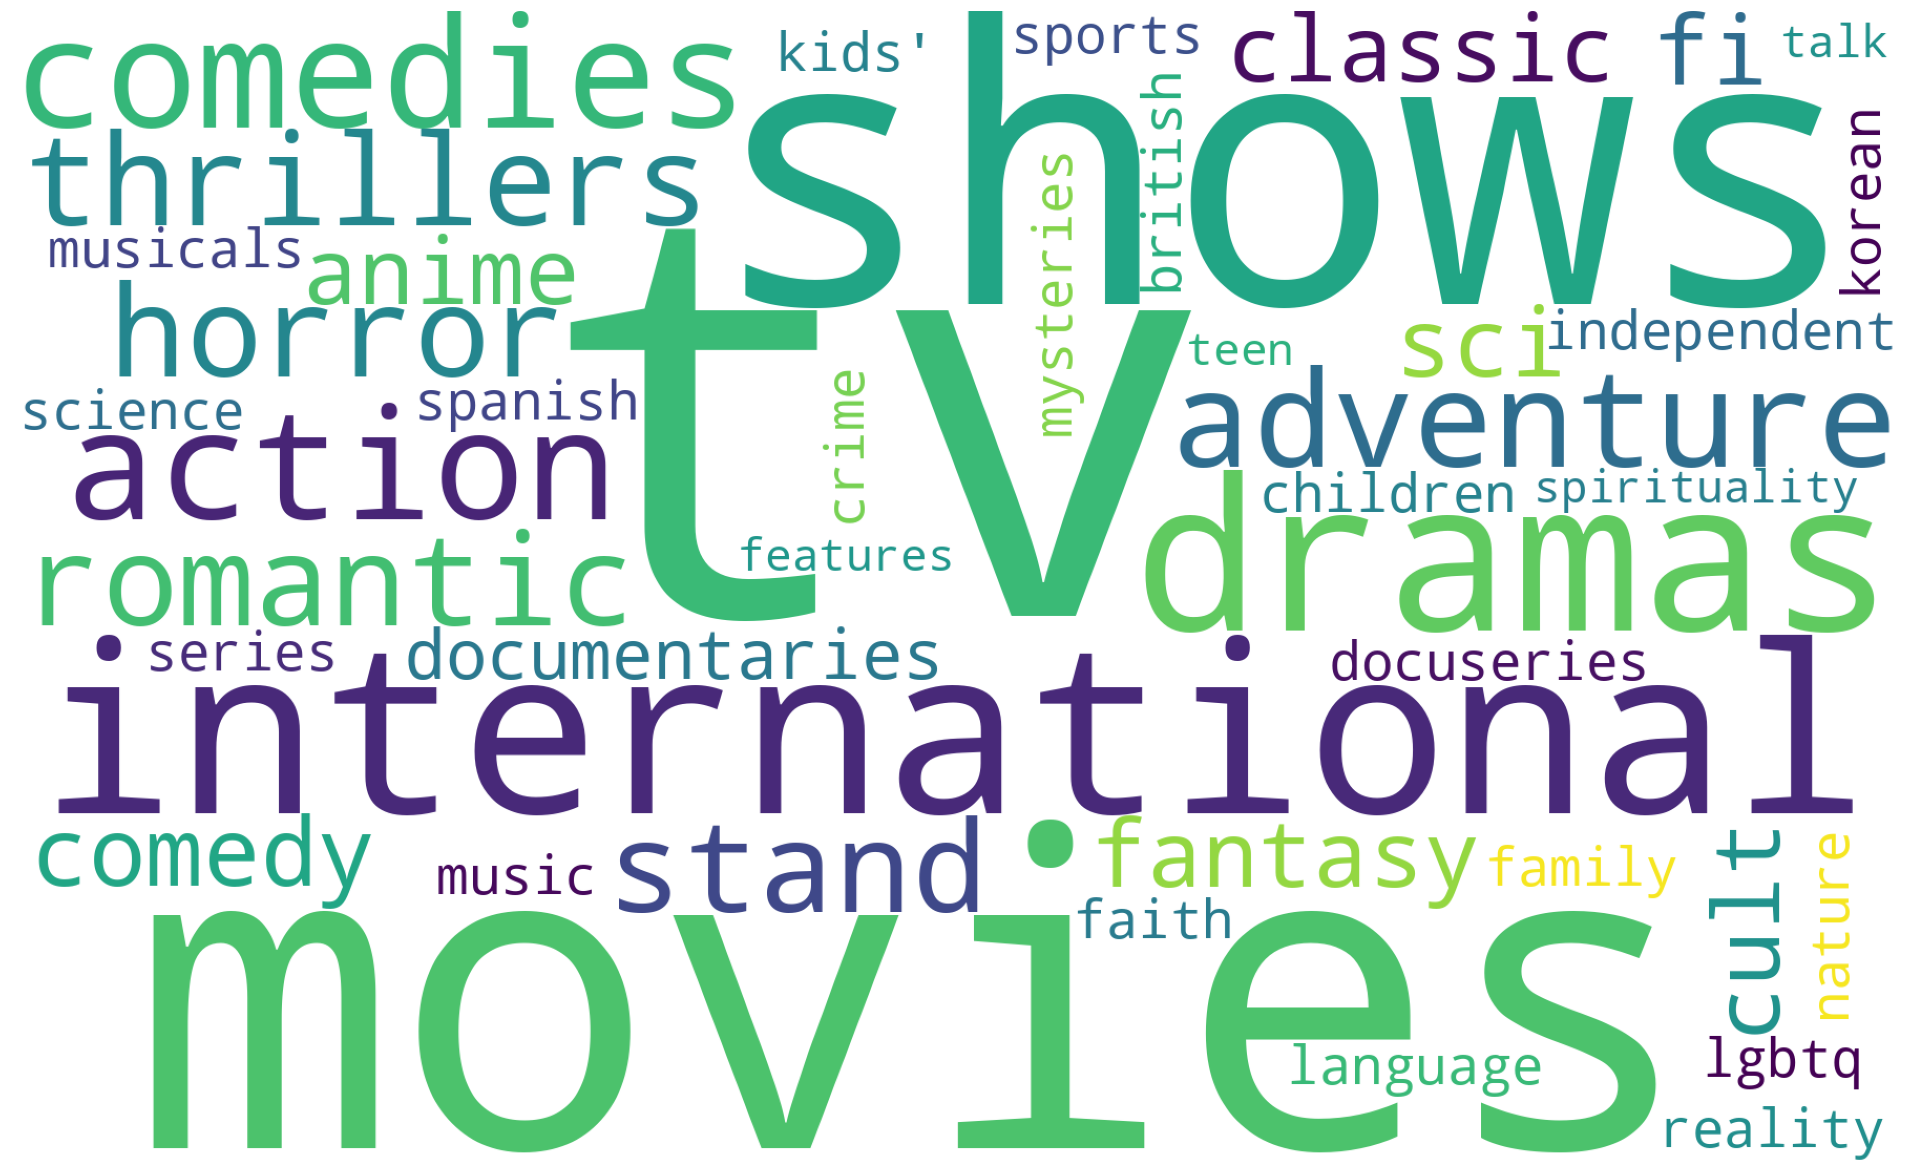

In [27]:
# to create a word-cloud with the category names, for easy deduction of the popular genres
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(    background_color='white',
                          width=1800,
                          height=1100
                         ).generate(" ".join(category_data.Category))
plt.imshow(wordcloud)
plt.axis('off')

# Display the plot
plt.show()

In [28]:
# # to create a pie chart like in the before section
# n = category_data[10:]['Number'].sum()
# df = pd.DataFrame({"Category":["Others"],"Number":[n]})
# category_data = category_data[:9]
# df1 = pd.concat([category_data,df], axis=0, ignore_index=True)
# plt.pie(df1['Number'], labels=df1['Category'], counterclock=False, autopct='%.0f%%')

International Movies are the most popular (slightly lower than half of that of the othet genres than the top-9) possibly due to their wider target audience and population who could mostly relate to them. Similarly, International TV Shows are the most in number concerning TV Shows. Standalone genres- drama, comedy, action have always been popular themes across shows/movies produced worldwide. Commercially successful titles tend to have a smooth blend of these flavours and such ones are deemed profitable for Netflix too.  

Independent Movies and documentaries are among the top-9 categories too which demonstrate that viewers are enjoying infortainement too. To enlighten a larger audience, having them on popular streaming platforms such as Netflix is a nice bet as Netflix too seem to be interested in buying such titles.

 ### Rating- Well-received and favoured ratings?

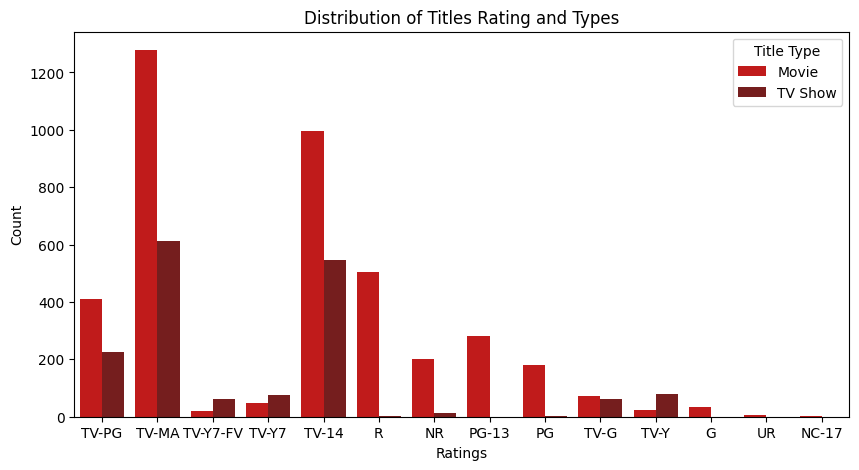

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x='rating',hue='type',data=data) # bar chart for ratings distinguised by type of the titles

# Axis labels and title
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Distribution of Titles Rating and Types')
plt.legend(title='Title Type')

# Display the plot
plt.show()

TV-MA is the most common rating for movies (1200+) and TV shows (almost half of that of movies- 600) which means that shows that are meant for mature audience or adults only (17+ ages) are present the most on Netflix. This gives us an idea of the target audeince of Netflix and the age group that Netflix' users are comprised of. TV-14 recommended for 14+ ages comes a close second. Rated titles that are least preferred are NC-17 which is slightly similar to TV-MA but narrower in range. Older teenagers and Adult targeted movies which are seem to be the most preferred so such titles with such content might be popular on Netflix. TV-G (for general audience) and TV-Y (for young children) are lower in number as Netflix is not targetted towards children but teenagers and adults.

### Duration- Desirable length of the content?

In [30]:
df1 = data[data['duration'].str.contains('Season')] # Duartion data of TV Shows as they would contain the work 'Season'
df1.shape == data[data['type']=='TV Show'].shape # to ensure all shows marked as 'TV Shows' do contain the word 'Season' as we will be working with the Duration column

True

In [31]:
# to remove the words Seasons and Season from the Duration columns, ignoring the case of the text
df1['duration'] = df1['duration'].str.replace('Seasons', '', case=False)
df1['duration'] = df1['duration'].str.replace('Season', '', case=False)

# to convert the remaining text which are numbers to integer type
df1['duration']=df1['duration'].astype(str).astype(int)

<ipython-input-31-06b9c33bf465>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['duration'] = df1['duration'].str.replace('Seasons', '', case=False)
<ipython-input-31-06b9c33bf465>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['duration'] = df1['duration'].str.replace('Season', '', case=False)
<ipython-input-31-06b9c33bf465>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [32]:
df1.head() # to get a glimpse of the new dataframe created

,show_id,type,title,director,cast,country,release_year,rating,duration,category,description,year_added,month_added
2,70234439,TV Show,Transformers Prime,,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob...",2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9
5,80163890,TV Show,Apaches,,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2016,TV-MA,1,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,2017,9
8,80117902,TV Show,Fire Chasers,,,United States,2017,TV-MA,1,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",2017,9
39,80178151,TV Show,The Spy,,"Sacha Baron Cohen, Noah Emmerich, Hadar Ratzon...",France,2019,TV-MA,1,"International TV Shows, TV Dramas, TV Thrillers","In the 1960s, Israeli clerk-turned-secret agen...",2019,9


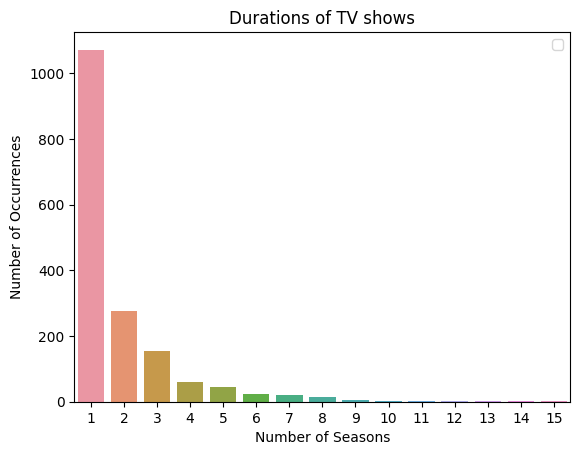

In [33]:
sns.countplot(x='duration',data=df1) # ranking the most-common durations for TV Shows

# Axis labels and title
plt.xlabel('Number of Seasons')
plt.ylabel('Number of Occurrences')
plt.title('Durations of TV shows')

plt.legend()
plt.show()

More than 1000 shows had only 1 season and the number falls to more than a quarter for shows with 2 seasons. The number decreases with the increase in the number of seasons. This choice of the makers and Netflix displays the viewers preference to quickly wrap up watching the show as they would have kept the viewers' taste while working.  

In [47]:
q1 = np.percentile(df2['duration'], 25)
median = np.percentile(df2['duration'], 50)
q3 = np.percentile(df2['duration'], 75)

print("Q1:", q1)
print("Median:", median)
print("Q3:", q3)
print(df2['duration'].max())
print(df2['duration'].min())

Q1: 87.0
Median: 98.0
Q3: 116.0
312
3


<ipython-input-34-1ced47519855>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['duration'] = df2['duration'].str.replace('min', '', case=False) # the word- 'mon' for minutes is removed
<ipython-input-34-1ced47519855>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['duration'] = df2['duration'].astype('str').astype('int')


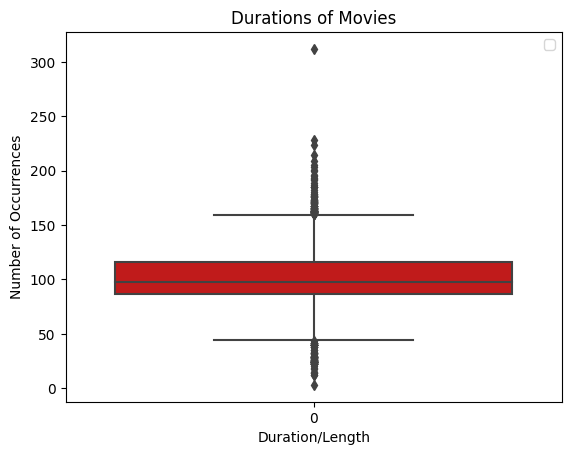

In [34]:
df2 = data[data['type']=='Movie'] # data pertaining to movies is filtered
df2['duration'] = df2['duration'].str.replace('min', '', case=False) # the word- 'mon' for minutes is removed
df2['duration'] = df2['duration'].astype('str').astype('int')
sns.boxplot(df2['duration']) # to get the quartiles of the length of the movies to understand the distribution of these values

# Axis labels and title
plt.xlabel('Duration/Length')
plt.ylabel('Number of Occurrences')
plt.title('Durations of Movies')

plt.legend()
plt.show()

The boxplot shows the 25th- 87 minutes, 50th (median), 75th- 116 minutes percentiles of the length of the movies as well as outliers. Half of the observations are above and half of them are below the median- 98 minutes or 1 hr 38 minutes. The box in the middle represents the middle 50% of the duration data. It is also slight right-skewed which means that the more films tend to be on the shorter side. Sticking to 90-100 minutes seems to be good enough to hold the viewers attention and for them to not get bored. There are many outliers too that are far from the other data points. Upon further inspection, to confirm if some of them were actual numbers and not mistakes, the shortest and longest were checked.    

The shortest in a 2014 film called Silent which is just 3 mins and the longest is a little over 100 times longer which is 312 minutes. The movie is a 2018 US-based drama- Black Mirror: Bandersnatch.

### Dates - Preferred Release Dates?

In [35]:
# Stats according to this dataset
print("Earliest title on Netflix is: ", data["year_added"].min())
print("\nOldest title on Netflix is: ", data["release_year"].min())

print("\n\nLatest added title on Netflix is: ", data["year_added"].max())
print("\nLatest released title on Netflix is: ", data["release_year"].max())

Earliest title on Netflix is:  2008

Oldest title on Netflix is:  1942


Latest added title on Netflix is:  2020

Latest released title on Netflix is:  2020


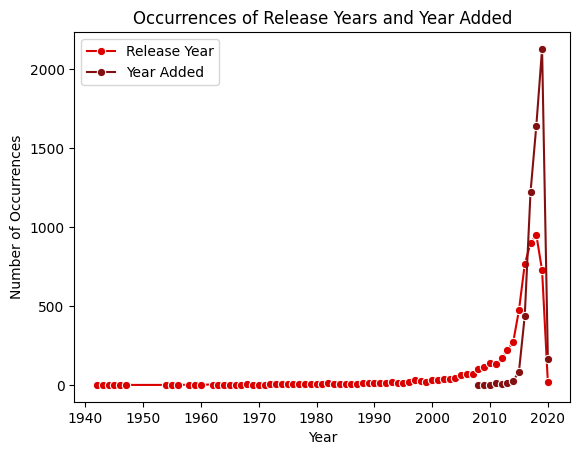

In [36]:
# line charts for both the years of release and addiition on netflix, marker is used for each of the data points
# .value_counts().index for the unique values
# .value_counts() for the counts of the unique values
sns.lineplot(x=data['release_year'].value_counts().index, y=data['release_year'].value_counts(), label='Release Year', marker='o')
sns.lineplot(x=data['year_added'].value_counts().index, y=data['year_added'].value_counts(), label='Year Added', marker='o')

# Axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences of Release Years and Year Added')

plt.legend()
plt.show()

In [43]:
data[data['year_added']==2020]["month_added"].max() # month until which the last set of movies in the latest year of addition have beeen added

1    166
Name: month_added, dtype: int64

In [44]:
data["month_added"].value_counts()

12    627
10    594
1     571
11    568
3     519
8     470
7     445
9     423
4     420
5     386
2     362
6     358
Name: month_added, dtype: int64

Years of release of a title and date seem to be coincidental 2015-16 onwards even though Netflix started streaming from 2007 [(see here)](https://www.netflix.com/tudum/articles/netflix-trivia-25th-anniversary#:~:text=Queue%20'em%20up%3A,(March%2010%2C%201998) however, the line for years of addition starts just before 2010 (at 2008). 2018 releases are present in larger numbers while the most additions have been in the year 2019. The number of releases plunged in 2020 which is because this dataset contains movies added until the first month- January only.

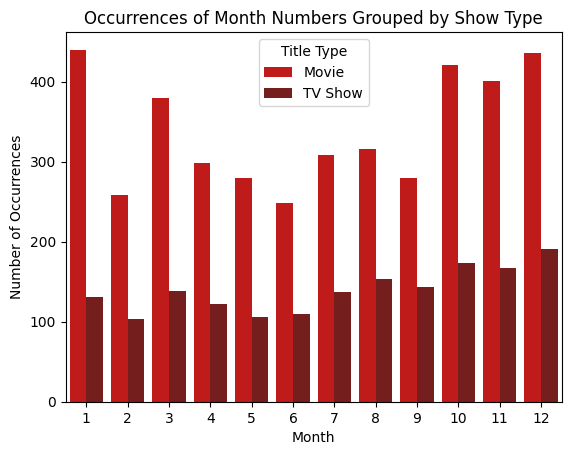

In [39]:
months = data.groupby(['type', 'month_added']).size().reset_index(name = 'count') # no. of occurrences of each month grouped by show type

sns.barplot(x = 'month_added', y = 'count', hue ='type', data = months) # bar graph with the number of the month on the x axis and the associated count on the y axis
# the 2 bars for each month are characterised by the type of the title

# Axis labels and title
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences of Month Numbers Grouped by Show Type')

plt.legend(title='Title Type')
plt.show()


Understanding the number of content released by the months can be helpful to assess which month to release our shows or movies as releasing in a quiet period with lesser options and competition could pull in more audience. December (could be due to it being holiday season in the Western countries including its topmost consumer- the US) is the busiest with October and January coming very close with less than a 100 titles difference. Releasing during the holiday seasons when people have more time to engage with content could seem like a good choice however since this is a streaming platform and content is viewable anytime, releasing during off-peak times such as May and June (begnning of summer), and February and April(before spring break or academic/annual year end in most places) is a good time.

## Conclusion
According to the data given and the visualizations made in this Python notebook, 1hr 30min movies that have an international background and a that of action and comedy are prominent on Netflix. Releasing content in the US, India, and the UK that too in off-peak times of June, February, or April among others could be kept in mind.  

All of the above factors should be kept in mind when negotiating a price with Netflix to gain the most profit. Success of the cast and directors could also be examined to quote a fair price however, not enough data has been given to infer this so it has been avoided in this project.